# Reto 2

**Luis Guillermo Vélez Segura 20181020113**


**Juan Diego Hernández Amaya 20181020097**

### Importamos las librerias

In [278]:
import tweepy 
import re
import nltk
import pandas as pd
import spacy
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from spacy.lang.es.stop_words import STOP_WORDS
from wordcloud import WordCloud
from spacytextblob.spacytextblob import SpacyTextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

### Credenciales de la cuenta de desarrollador

In [279]:
API_KEY= 'qBbottw9Kss84eASiUP9F9PmN'
API_KEY_SECRET= 'hT7NOnfnC0EnATvFfa9AuPdVtnFAV5HSLRZkLi8mK4WlYaBZR5'
ACCESS_TOKEN= '1433233742039076865-OBiN8nJSEgWDn4q02FFhF9ilA2tEKa'
ACCESS_TOKEN_SECRET= 'L34gTsIuRst3EEzFSwvGmQY1jTrYiahyaj5j2zWmScGm3'
BEARER_TOKEN='AAAAAAAAAAAAAAAAAAAAAIQhZAEAAAAALaksDb4sIH%2BaRAxlC%2Bdsrleo3Ok%3DSPkpCLhpPv5Gir7SvuRygmnZfbmCDgLflqeOcNrNGQ29wcyFSM'

### Creamos nuestro cliente y recuperamos los tweets

In [280]:
Client=tweepy.Client(bearer_token=BEARER_TOKEN, consumer_key=API_KEY, 
consumer_secret=API_KEY_SECRET, access_token=ACCESS_TOKEN, 
access_token_secret=ACCESS_TOKEN_SECRET, 
wait_on_rate_limit=True)

query= '(petro popular OR petro mediocre) -is:retweet lang:es'

tweets= Client.search_recent_tweets(query=query, max_results=100)
stop_words = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")
nlp.add_pipe("spacytextblob")

### Creamos el dataframe con los tweets recuperados

In [281]:
data = pd.DataFrame() 
data['Tweet']=[tweet.text for tweet in tweets.data]
data

,Tweet
0,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de..."
1,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular
2,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car..."
3,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ..."
4,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t...."
...,...
95,"@AABenedetti por favor sugierale a petro que use lenguaje más sencillo mas de la GERGA POPULAR, he presenciado cómo ..."
96,@ELTIEMPO Por eso el mediocre @FicoGutierrez sale con patrañas de que Petro quiere acabar el banco si al liberar el...
97,"@TorresVigoya @nilsonagu @jflafaurie @MariaFdaCabal Discutir con un mediocre e ignorante como usted, es taaan difíci..."
98,"@EnriquePenalosa Este tipo sin propuestas al igual que su mediocre coalición solo hablan de Petro, publicidad gratui..."


### Tokenizamos el tweet

In [282]:
def tokenizar(txt):
    txt=word_tokenize(txt)
    return txt
data['Token']=data['Tweet'].apply(lambda x: tokenizar(x))
data.head(10)

,Tweet,Token
0,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de...","[@, JERobledo, Robledo, no, quiere, nada, con, Petro, ,, pero, como, Petro, lo, aventaja, en, favorabilidad, popular..."
1,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular,"[¡Echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, TikTok, https, :, //t.co/g44uOAm0rR, Petro, una, esperanza..."
2,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car...","[@, DiegoASantos, ¿Buen, presidente, ?, ¿Ud, también, vive, en, Polombia, ?, Duque, es, un, presidente, mediocre, ,,..."
3,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ...","[@, wiacarni, @, fdbedout, @, petrogustavo, Fue, la, Presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,..."
4,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t....","[Cuando, la, Corte, no, apruebe, la, reelección, de, Petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ..."
5,@RevocatoriaDQ @miapelaez @QuinteroCalle Triste la vida de Quintero. Que frustración tan grande sentirá este señor a...,"[@, RevocatoriaDQ, @, miapelaez, @, QuinteroCalle, Triste, la, vida, de, Quintero, ., Que, frustración, tan, grande,..."
6,"@DanielSanin Daniel, ¿te has imaginado las sentencias costitucionales y las de los jueces colegiados y singulares, p...","[@, DanielSanin, Daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad..."
7,ADONDE SE VAN A METER LA PLATICA LOS CHAVISTAS? SE LES ESTA PONIENDO NEGRO Y CHIQUITO EL MUNDO. Tiembla PDVSA con Su...,"[ADONDE, SE, VAN, A, METER, LA, PLATICA, LOS, CHAVISTAS, ?, SE, LES, ESTA, PONIENDO, NEGRO, Y, CHIQUITO, EL, MUNDO, ..."
8,ADIVINEN ADONDE VAN A TENER QUE METERSE EL DINERO LOS CHAVISTAS? Tiembla PDVSA con Su Majestad Suiza Venezuela. pens...,"[ADIVINEN, ADONDE, VAN, A, TENER, QUE, METERSE, EL, DINERO, LOS, CHAVISTAS, ?, Tiembla, PDVSA, con, Su, Majestad, Su..."
9,URGENTE! PETRO HIZO TREMENDA L0CUR4 EN EJE CAFETERO. RCN Y SEMANA NO CUE... https://t.co/ov0sASMHPm a través de @You...,"[URGENTE, !, PETRO, HIZO, TREMENDA, L0CUR4, EN, EJE, CAFETERO, ., RCN, Y, SEMANA, NO, CUE, ..., https, :, //t.co/ov0..."


### Convertimos a minúscula 

In [283]:
def Minimizar(txt):
    txt=[w.lower() for w in txt]
    return txt
data['Minimizar']=data['Token'].apply(lambda x: Minimizar(x))
data.head(10)

,Tweet,Token,Minimizar
0,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de...","[@, JERobledo, Robledo, no, quiere, nada, con, Petro, ,, pero, como, Petro, lo, aventaja, en, favorabilidad, popular...","[@, jerobledo, robledo, no, quiere, nada, con, petro, ,, pero, como, petro, lo, aventaja, en, favorabilidad, popular..."
1,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular,"[¡Echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, TikTok, https, :, //t.co/g44uOAm0rR, Petro, una, esperanza...","[¡echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, una, esperanza..."
2,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car...","[@, DiegoASantos, ¿Buen, presidente, ?, ¿Ud, también, vive, en, Polombia, ?, Duque, es, un, presidente, mediocre, ,,...","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, también, vive, en, polombia, ?, duque, es, un, presidente, mediocre, ,,..."
3,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ...","[@, wiacarni, @, fdbedout, @, petrogustavo, Fue, la, Presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[@, wiacarni, @, fdbedout, @, petrogustavo, fue, la, presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,..."
4,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t....","[Cuando, la, Corte, no, apruebe, la, reelección, de, Petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ...","[cuando, la, corte, no, apruebe, la, reelección, de, petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ..."
5,@RevocatoriaDQ @miapelaez @QuinteroCalle Triste la vida de Quintero. Que frustración tan grande sentirá este señor a...,"[@, RevocatoriaDQ, @, miapelaez, @, QuinteroCalle, Triste, la, vida, de, Quintero, ., Que, frustración, tan, grande,...","[@, revocatoriadq, @, miapelaez, @, quinterocalle, triste, la, vida, de, quintero, ., que, frustración, tan, grande,..."
6,"@DanielSanin Daniel, ¿te has imaginado las sentencias costitucionales y las de los jueces colegiados y singulares, p...","[@, DanielSanin, Daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad...","[@, danielsanin, daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad..."
7,ADONDE SE VAN A METER LA PLATICA LOS CHAVISTAS? SE LES ESTA PONIENDO NEGRO Y CHIQUITO EL MUNDO. Tiembla PDVSA con Su...,"[ADONDE, SE, VAN, A, METER, LA, PLATICA, LOS, CHAVISTAS, ?, SE, LES, ESTA, PONIENDO, NEGRO, Y, CHIQUITO, EL, MUNDO, ...","[adonde, se, van, a, meter, la, platica, los, chavistas, ?, se, les, esta, poniendo, negro, y, chiquito, el, mundo, ..."
8,ADIVINEN ADONDE VAN A TENER QUE METERSE EL DINERO LOS CHAVISTAS? Tiembla PDVSA con Su Majestad Suiza Venezuela. pens...,"[ADIVINEN, ADONDE, VAN, A, TENER, QUE, METERSE, EL, DINERO, LOS, CHAVISTAS, ?, Tiembla, PDVSA, con, Su, Majestad, Su...","[adivinen, adonde, van, a, tener, que, meterse, el, dinero, los, chavistas, ?, tiembla, pdvsa, con, su, majestad, su..."
9,URGENTE! PETRO HIZO TREMENDA L0CUR4 EN EJE CAFETERO. RCN Y SEMANA NO CUE... https://t.co/ov0sASMHPm a través de @You...,"[URGENTE, !, PETRO, HIZO, TREMENDA, L0CUR4, EN, EJE, CAFETERO, ., RCN, Y, SEMANA, NO, CUE, ..., https, :, //t.co/ov0...","[urgente, !, petro, hizo, tremenda, l0cur4, en, eje, cafetero, ., rcn, y, semana, no, cue, ..., https, :, //t.co/ov0..."


### Hallamos palabras reservadas del tweet

In [284]:
def StopWords(txt):
    txt=[w for w in txt if w in stop_words]
    return txt
data['Palabras_Reservadas']=data['Minimizar'].apply(lambda x: StopWords(x))
data.head(10)

,Tweet,Token,Minimizar,Palabras_Reservadas
0,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de...","[@, JERobledo, Robledo, no, quiere, nada, con, Petro, ,, pero, como, Petro, lo, aventaja, en, favorabilidad, popular...","[@, jerobledo, robledo, no, quiere, nada, con, petro, ,, pero, como, petro, lo, aventaja, en, favorabilidad, popular...","[no, nada, con, pero, como, lo, en, sí, con, él]"
1,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular,"[¡Echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, TikTok, https, :, //t.co/g44uOAm0rR, Petro, una, esperanza...","[¡echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, una, esperanza...","[un, al, de, una]"
2,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car...","[@, DiegoASantos, ¿Buen, presidente, ?, ¿Ud, también, vive, en, Polombia, ?, Duque, es, un, presidente, mediocre, ,,...","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, también, vive, en, polombia, ?, duque, es, un, presidente, mediocre, ,,...","[también, en, es, un, de, la, y, de, por, los, del, que, es, lo, que, un, se, la, la, a, al, a]"
3,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ...","[@, wiacarni, @, fdbedout, @, petrogustavo, Fue, la, Presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[@, wiacarni, @, fdbedout, @, petrogustavo, fue, la, presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[fue, la, la, que, no, lo, sería, otro, más, se, contra, porque, que, los, otros, no, tienen, de, de]"
4,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t....","[Cuando, la, Corte, no, apruebe, la, reelección, de, Petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ...","[cuando, la, corte, no, apruebe, la, reelección, de, petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ...","[cuando, la, no, la, de, a, e, la]"
5,@RevocatoriaDQ @miapelaez @QuinteroCalle Triste la vida de Quintero. Que frustración tan grande sentirá este señor a...,"[@, RevocatoriaDQ, @, miapelaez, @, QuinteroCalle, Triste, la, vida, de, Quintero, ., Que, frustración, tan, grande,...","[@, revocatoriadq, @, miapelaez, @, quinterocalle, triste, la, vida, de, quintero, ., que, frustración, tan, grande,...","[la, de, que, este, al, a, lo, que, es, es, que, el, es, un, eso, es]"
6,"@DanielSanin Daniel, ¿te has imaginado las sentencias costitucionales y las de los jueces colegiados y singulares, p...","[@, DanielSanin, Daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad...","[@, danielsanin, daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad...","[has, las, y, las, de, los, y, por, no, a, ni, ni, cuando, los, el, del, del]"
7,ADONDE SE VAN A METER LA PLATICA LOS CHAVISTAS? SE LES ESTA PONIENDO NEGRO Y CHIQUITO EL MUNDO. Tiembla PDVSA con Su...,"[ADONDE, SE, VAN, A, METER, LA, PLATICA, LOS, CHAVISTAS, ?, SE, LES, ESTA, PONIENDO, NEGRO, Y, CHIQUITO, EL, MUNDO, ...","[adonde, se, van, a, meter, la, platica, los, chavistas, ?, se, les, esta, poniendo, negro, y, chiquito, el, mundo, ...","[se, a, la, los, se, les, esta, y, el, con, su, de]"
8,ADIVINEN ADONDE VAN A TENER QUE METERSE EL DINERO LOS CHAVISTAS? Tiembla PDVSA con Su Majestad Suiza Venezuela. pens...,"[ADIVINEN, ADONDE, VAN, A, TENER, QUE, METERSE, EL, DINERO, LOS, CHAVISTAS, ?, Tiembla, PDVSA, con, Su, Majestad, Su...","[adivinen, adonde, van, a, tener, que, meterse, el, dinero, los, chavistas, ?, tiembla, pdvsa, con, su, majestad, su...","[a, que, el, los, con, su, de]"
9,URGENTE! PETRO HIZO TREMENDA L0CUR4 EN EJE CAFETERO. RCN Y SEMANA NO CUE... https://t.co/ov0sASMHPm a través de @You.

### Tweet sin palabras reservadas

In [285]:
def NoStopWords(txt):
    txt=[w for w in txt if w not in stop_words]
    return txt
data['TweetNoStopWords']=data['Minimizar'].apply(lambda x: NoStopWords(x))
data.head(10)

,Tweet,Token,Minimizar,Palabras_Reservadas,TweetNoStopWords
0,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de...","[@, JERobledo, Robledo, no, quiere, nada, con, Petro, ,, pero, como, Petro, lo, aventaja, en, favorabilidad, popular...","[@, jerobledo, robledo, no, quiere, nada, con, petro, ,, pero, como, petro, lo, aventaja, en, favorabilidad, popular...","[no, nada, con, pero, como, lo, en, sí, con, él]","[@, jerobledo, robledo, quiere, petro, ,, petro, aventaja, favorabilidad, popular, ,, ahora, quiere, debatir, .]"
1,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular,"[¡Echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, TikTok, https, :, //t.co/g44uOAm0rR, Petro, una, esperanza...","[¡echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, una, esperanza...","[un, al, de, una]","[¡echa, vistazo, vídeo, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, esperanza, popular]"
2,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car...","[@, DiegoASantos, ¿Buen, presidente, ?, ¿Ud, también, vive, en, Polombia, ?, Duque, es, un, presidente, mediocre, ,,...","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, también, vive, en, polombia, ?, duque, es, un, presidente, mediocre, ,,...","[también, en, es, un, de, la, y, de, por, los, del, que, es, lo, que, un, se, la, la, a, al, a]","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, vive, polombia, ?, duque, presidente, mediocre, ,, incapaz, dar, cara, ..."
3,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ...","[@, wiacarni, @, fdbedout, @, petrogustavo, Fue, la, Presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[@, wiacarni, @, fdbedout, @, petrogustavo, fue, la, presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[fue, la, la, que, no, lo, sería, otro, más, se, contra, porque, que, los, otros, no, tienen, de, de]","[@, wiacarni, @, fdbedout, @, petrogustavo, presión, social, dejó, entrar, ,, sino, precandidato, ,, además, luis, p..."
4,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t....","[Cuando, la, Corte, no, apruebe, la, reelección, de, Petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ...","[cuando, la, corte, no, apruebe, la, reelección, de, petro, ,, saldrán, a, clausurarla, e, imponer, la, democracia, ...","[cuando, la, no, la, de, a, e, la]","[corte, apruebe, reelección, petro, ,, saldrán, clausurarla, imponer, democracia, popular, ., https, :, //t.co/tvy0a..."
5,@RevocatoriaDQ @miapelaez @QuinteroCalle Triste la vida de Quintero. Que frustración tan grande sentirá este señor a...,"[@, RevocatoriaDQ, @, miapelaez, @, QuinteroCalle, Triste, la, vida, de, Quintero, ., Que, frustración, tan, grande,...","[@, revocatoriadq, @, miapelaez, @, quinterocalle, triste, la, vida, de, quintero, ., que, frustración, tan, grande,...","[la, de, que, este, al, a, lo, que, es, es, que, el, es, un, eso, es]","[@, revocatoriadq, @, miapelaez, @, quinterocalle, triste, vida, quintero, ., frustración, tan, grande, sentirá, señ..."
6,"@DanielSanin Daniel, ¿te has imaginado las sentencias costitucionales y las de los jueces colegiados y singulares, p...","[@, DanielSanin, Daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad...","[@, danielsanin, daniel, ,, ¿te, has, imaginado, las, sentencias, costitucionales, y, las, de, los, jueces, colegiad...","[has, las, y, las, de, los, y, por, no, a, ni, ni, cuando, los, el, del, del]","[@, danielsanin, daniel, ,, ¿te, imaginado, sentencias, costitucionales, jueces, colegiados, singulares, ,, consulta..."
7,ADONDE SE VAN A METER LA PLATICA LOS CHAVISTAS? SE LES ESTA PONIENDO NEGRO Y CHIQU

### Aplicando spaCy

In [286]:
def RecuperarTXT(txt):
    txtL=''
    textos=''
    for word in txt:
        txtL += word + " "
    doc=nlp(txtL)
    for token in doc: 
        if not token.is_punct:
            textos += token.text + " "
    doc=nlp(textos)
    return doc
data['Recuperar']=data['TweetNoStopWords'].apply(lambda x: RecuperarTXT(x))
pd.set_option('display.max_colwidth',120)
data[['Recuperar','TweetNoStopWords']]

,Recuperar,TweetNoStopWords
0,"(jerobledo, robledo, quiere, petro, petro, aventaja, favorabilidad, popular, ahora, quiere, debatir)","[@, jerobledo, robledo, quiere, petro, ,, petro, aventaja, favorabilidad, popular, ,, ahora, quiere, debatir, .]"
1,"(echa, vistazo, vídeo, henryreina2353, tiktok, https, //t.co, g44uoam0rr, petro, esperanza, popular)","[¡echa, vistazo, vídeo, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, esperanza, popular]"
2,"(diegoasantos, buen, presidente, ud, vive, polombia, duque, presidente, mediocre, incapaz, dar, cara, responsabiliza...","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, vive, polombia, ?, duque, presidente, mediocre, ,, incapaz, dar, cara, ..."
3,"(wiacarni, fdbedout, petrogustavo, presión, social, dejó, entrar, sino, precandidato, además, luis, pérez, quería, m...","[@, wiacarni, @, fdbedout, @, petrogustavo, presión, social, dejó, entrar, ,, sino, precandidato, ,, además, luis, p..."
4,"(corte, apruebe, reelección, petro, saldrán, clausurarla, imponer, democracia, popular, https, //t.co, tvy0a4su1, m)","[corte, apruebe, reelección, petro, ,, saldrán, clausurarla, imponer, democracia, popular, ., https, :, //t.co/tvy0a..."
...,...,...
95,"(aabenedetti, favor, sugierale, petro, use, lenguaje, sencillo, mas, gerga, popular, presenciado, cómo, gente, queda...","[@, aabenedetti, favor, sugierale, petro, use, lenguaje, sencillo, mas, gerga, popular, ,, presenciado, cómo, gente,..."
96,"(eltiempo, mediocre, ficogutierrez, sale, patrañas, petro, quiere, acabar, banco, si, liberar, banco, cd, pueden, ha...","[@, eltiempo, mediocre, @, ficogutierrez, sale, patrañas, petro, quiere, acabar, banco, si, liberar, banco, cd, pued..."
97,"(torresvigoya, nilsonagu, jflafaurie, mariafdacabal, discutir, mediocre, ignorante, usted, taaan, difícil, usted, go...","[@, torresvigoya, @, nilsonagu, @, jflafaurie, @, mariafdacabal, discutir, mediocre, ignorante, usted, ,, taaan, dif..."
98,"(enriquepenalosa, tipo, propuestas, igual, mediocre, coalición, solo, hablan, petro, publicidad, gratuita, jajajajajaj)","[@, enriquepenalosa, tipo, propuestas, igual, mediocre, coalición, solo, hablan, petro, ,, publicidad, gratuita, jaj..."


### Lematizando tweet

In [287]:
def LematizarTXT(txt):
    doc=nlp(txt)
    Lemma= [ token.lemma_ for token in doc]
    return Lemma
data['Lematizar']=data['Recuperar'].apply(lambda x: LematizarTXT(x))
pd.set_option('display.max_colwidth',120)
data[['Lematizar','TweetNoStopWords']]

,Lematizar,TweetNoStopWords
0,"[jerobledo, robledo, querer, petro, petro, aventajar, favorabilidad, popular, ahora, querer, debatir]","[@, jerobledo, robledo, quiere, petro, ,, petro, aventaja, favorabilidad, popular, ,, ahora, quiere, debatir, .]"
1,"[echar, vistazo, vídeo, henryreina2353, tiktok, https, //t.co, g44uoam0rr, petro, esperanza, popular]","[¡echa, vistazo, vídeo, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, esperanza, popular]"
2,"[diegoasanto, buen, presidente, ud, vivir, polombia, ducar, presidente, mediocre, incapaz, dar, cara, responsabiliza...","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, vive, polombia, ?, duque, presidente, mediocre, ,, incapaz, dar, cara, ..."
3,"[wiacarni, fdbedout, petrogustavo, presión, social, dejar, entrar, sino, precandidato, además, luis, pérez, querer, ...","[@, wiacarni, @, fdbedout, @, petrogustavo, presión, social, dejó, entrar, ,, sino, precandidato, ,, además, luis, p..."
4,"[corte, aprobar, reelección, petro, salir, clausurar él, imponer, democracia, popular, https, //t.co, tvy0a4su1, m]","[corte, apruebe, reelección, petro, ,, saldrán, clausurarla, imponer, democracia, popular, ., https, :, //t.co/tvy0a..."
...,...,...
95,"[aabenedetti, favor, sugieralar, petro, usar, lenguaje, sencillo, mas, gerga, popular, presenciado, cómo, gente, que...","[@, aabenedetti, favor, sugierale, petro, use, lenguaje, sencillo, mas, gerga, popular, ,, presenciado, cómo, gente,..."
96,"[eltiempo, mediocre, ficogutierrez, salir, patraña, petro, querer, acabar, banco, si, liberar, banco, cd, poder, hac...","[@, eltiempo, mediocre, @, ficogutierrez, sale, patrañas, petro, quiere, acabar, banco, si, liberar, banco, cd, pued..."
97,"[torresvigoya, nilsonagu, jflafaurie, mariafdacabal, discutir, mediocre, ignorante, usted, taaan, difícil, usted, go...","[@, torresvigoya, @, nilsonagu, @, jflafaurie, @, mariafdacabal, discutir, mediocre, ignorante, usted, ,, taaan, dif..."
98,"[enriquepenalós, tipo, propuesta, igual, mediocre, coalición, solo, hablar, petro, publicidad, gratuito, jajajajajaj]","[@, enriquepenalosa, tipo, propuestas, igual, mediocre, coalición, solo, hablan, petro, ,, publicidad, gratuita, jaj..."


### Hallando polaridad del tweet

In [288]:
def Polaridad(txt):
    doc=nlp(txt)
    return doc._.polarity
data['Polaridad']=data['Tweet'].apply(lambda x: Polaridad(x))
pd.set_option('display.max_colwidth',120)
data[['Polaridad','Tweet']]


,Polaridad,Tweet
0,0.000000,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de..."
1,0.600000,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular
2,-0.500000,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car..."
3,0.316667,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ..."
4,0.600000,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t...."
...,...,...
95,0.600000,"@AABenedetti por favor sugierale a petro que use lenguaje más sencillo mas de la GERGA POPULAR, he presenciado cómo ..."
96,-0.500000,@ELTIEMPO Por eso el mediocre @FicoGutierrez sale con patrañas de que Petro quiere acabar el banco si al liberar el...
97,-0.500000,"@TorresVigoya @nilsonagu @jflafaurie @MariaFdaCabal Discutir con un mediocre e ignorante como usted, es taaan difíci..."
98,-0.500000,"@EnriquePenalosa Este tipo sin propuestas al igual que su mediocre coalición solo hablan de Petro, publicidad gratui..."


### Hallando subjetividad del tweet

In [301]:
def Subjetividad(txt):
    doc=nlp(txt)
    return doc._.subjectivity
data['Subjetividad']=data['Tweet'].apply(lambda x: Subjetividad(x))
pd.set_option('display.max_colwidth',500)
data[['Subjetividad','Tweet']].head(99)

,Subjetividad,Tweet
0,0.000000,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere debatir con él."
1,0.900000,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular
2,1.000000,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la cara y de responsabilizarse por los problemas del país, que es lo mínimo que debe tener un gobernante. Se la pasó echándole la culpa a Santos, al Paro, a Petro, etc..."
3,0.483333,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, además Luis Pérez se quería medir contra Petro directamente. Porque sabía que los otros no tienen Masa popular de 8M de votantes."
4,0.900000,"Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t.co/tVy0A4sU1m"
...,...,...
94,1.000000,"@3lPerroCobarde @julioce45000165 @RobinsonBaena @jerezalclima La clásica respuesta de un mediocre vago que no conoce ni Chía, menos Suiza, cada quién vive como le dan sus capacidades, yo muy bien y tú? \nBogotá es un paraíso gracias a Petro y Claudia, cierto? Hoy aliados 🤣🤡💩"
95,0.900000,"@AABenedetti por favor sugierale a petro que use lenguaje más sencillo mas de la GERGA POPULAR, he presenciado cómo la gente queda un poco confundida después de escucharlo hablar. Y ahí llega el otro y aprovecha venga le explicó exactamente lo que quiso decir petro y obviamente"
96,1.000000,@ELTIEMPO Por eso el mediocre @FicoGutierrez sale con patrañas de que Petro quiere acabar el banco si al liberar el banco del CD ya no pueden hacer sus chancucos habituales.
97,1.000000,"@TorresVigoya @nilsonagu @jflafaurie @MariaFdaCabal Discutir con un mediocre e ignorante como usted, es taaan difícil. Usted goza de los beneficios del estado, yo no, yo trabajo, me sacrifico, lo que tengo lo debo a mi esfuerzo, usted goza de una libertad que yo y muchos como otros le hemos dado y que Petro nos quiere quitar."


### Evaluando el tweet

In [290]:
def Evaluacion(txt):
    doc=nlp(txt)
    return doc._.assessments
data['Evaluacion']=data['Tweet'].apply(lambda x: Evaluacion(x))
pd.set_option('display.max_colwidth',120)
data[['Evaluacion','Tweet']]

,Evaluacion,Tweet
0,[],"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de..."
1,"[([popular], 0.6, 0.9, None)]",¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular
2,"[([mediocre], -0.5, 1.0, None)]","@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car..."
3,"[([social], 0.03333333333333333, 0.06666666666666667, None), ([popular], 0.6, 0.9, None)]","@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ..."
4,"[([popular], 0.6, 0.9, None)]","Cuando la Corte no apruebe la reelección de Petro, saldrán a clausurarla e imponer la democracia popular. https://t...."
...,...,...
95,"[([popular], 0.6, 0.9, None)]","@AABenedetti por favor sugierale a petro que use lenguaje más sencillo mas de la GERGA POPULAR, he presenciado cómo ..."
96,"[([mediocre], -0.5, 1.0, None)]",@ELTIEMPO Por eso el mediocre @FicoGutierrez sale con patrañas de que Petro quiere acabar el banco si al liberar el...
97,"[([mediocre], -0.5, 1.0, None)]","@TorresVigoya @nilsonagu @jflafaurie @MariaFdaCabal Discutir con un mediocre e ignorante como usted, es taaan difíci..."
98,"[([mediocre], -0.5, 1.0, None)]","@EnriquePenalosa Este tipo sin propuestas al igual que su mediocre coalición solo hablan de Petro, publicidad gratui..."


### Graficando análisis de sentimiento

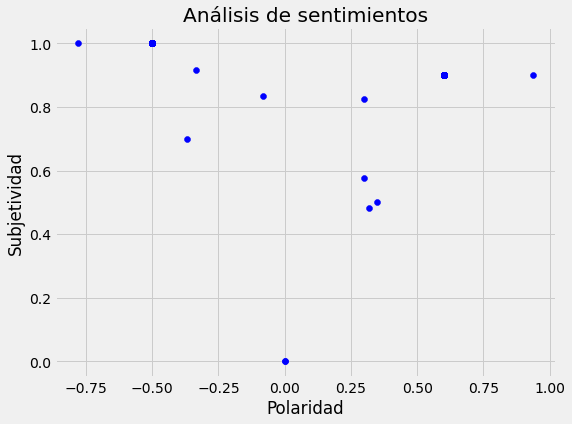

In [291]:
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
  plt.scatter(data['Polaridad'][i], data['Subjetividad'][i], color='blue')

plt.title('Análisis de sentimientos')
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad')
plt.show()

### Clasificar tweets segun su polaridad

In [292]:
def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data['Analysis'] = data['Polaridad'].apply(analysis)


### Estadistica descriptiva polaridad y subjetividad

In [293]:
data[['Polaridad','Subjetividad']].describe()

,Polaridad,Subjetividad
count,100.000000,100.000000
mean,0.023396,0.915333
std,0.540854,0.160997
min,-0.781250,0.000000
25%,-0.500000,0.900000
50%,-0.208333,0.900000
75%,0.600000,1.000000
max,0.937500,1.000000


### Gráfico análisis de sentimiento

Negative:  51.0 %
Positive:  47.0 %
Neutral:  2.0 %


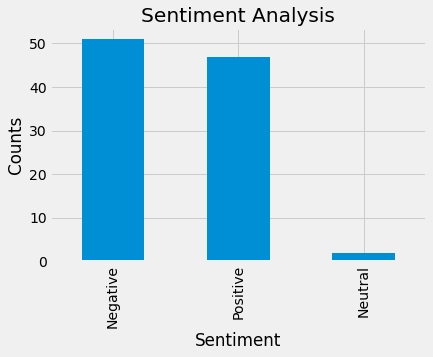

In [294]:
ntweet = data[data.Analysis == 'Negative']
nteet = ntweet['Tweet']
print('Negative: ',round(ntweet.shape[0] / data.shape[0] * 100, 1),'%')

ptweet = data[data.Analysis == 'Positive']
pteet = ptweet['Tweet']
print('Positive: ',round(ptweet.shape[0] / data.shape[0] * 100, 1),'%')

mtweet = data[data.Analysis == 'Neutral']
mteet = mtweet['Tweet']
print('Neutral: ',round(mtweet.shape[0] / data.shape[0] * 100, 1),'%')

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Preparar tweets para la nube de palabras

In [295]:
def Texto(txt):
    txtL=''
    for word in txt:
        txtL += word.text + " "
    return txtL
data['Texto']=data['Recuperar'].apply(lambda x: Texto(x))

### Graficar nube de palabras 

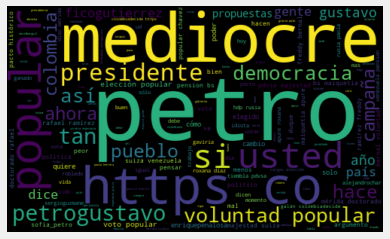

In [296]:
all_words=' '.join( [twts for twts in data['Texto']])
word_Cloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Eliminando signos de puntuación

In [297]:
tweets_tidy = data
def TokenNoPunct(txt):
    words = [word for word in txt if word.isalpha()]
    return words
tweets_tidy['Token_no_punct']=tweets_tidy['TweetNoStopWords'].apply(lambda x: Minimizar(x))
tweets_tidy['Token_no_punct']=tweets_tidy['Token_no_punct'].apply(lambda x: TokenNoPunct(x)) 
tweets_tidy = tweets_tidy.explode(column='Token_no_punct') 
tweets_tidy = tweets_tidy.drop(columns='Tweet')
tweets_tidy = tweets_tidy.rename(columns={'Token_no_punct':'token'})



### Analizando frecuencia de plabaras de los tweets

In [298]:
tweets_tidy.groupby(['Analysis','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('Analysis') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

Analysis           token  count
Analysis                                      
Negative 327   Negative        mediocre     52
         405   Negative           petro     50
         550   Negative           usted     14
         524   Negative             tan     10
         270   Negative           https      9
         504   Negative              si      8
         80    Negative         campaña      7
         426   Negative      presidente      7
         226   Negative   ficogutierrez      6
         406   Negative    petrogustavo      6
Neutral  598    Neutral           petro      3
         602    Neutral          quiere      2
         576    Neutral           ahora      1
         593    Neutral  marcelesmontxo      1
         607    Neutral          tratan      1
         606    Neutral         robledo      1
         605    Neutral        ridículo      1
         604    Neutral    richizuluaga      1
         603    Neutral        reconoce      1
         601    Neutral          propio      1
Positive 1010  Positive           petro     53
         1026  Positive         popular     48
         890   Positive           https     18
         1178  Positive        voluntad     11
         769   Positive      democracia      9
         1182  Positive            voto      8
         806   Positive        elección      7
         990   Positive           pacto      7
         853   Positive         gaviria      7
         1011  Positive    petrogustavo      7

### Dataset final

In [299]:
data

,Tweet,Token,Minimizar,Palabras_Reservadas,TweetNoStopWords,Recuperar,Lematizar,Polaridad,Subjetividad,Evaluacion,Analysis,Texto,Token_no_punct
0,"@JERobledo Robledo no quiere nada con Petro, pero como Petro lo aventaja en favorabilidad popular,ahora sí quiere de...","[@, JERobledo, Robledo, no, quiere, nada, con, Petro, ,, pero, como, Petro, lo, aventaja, en, favorabilidad, popular...","[@, jerobledo, robledo, no, quiere, nada, con, petro, ,, pero, como, petro, lo, aventaja, en, favorabilidad, popular...","[no, nada, con, pero, como, lo, en, sí, con, él]","[@, jerobledo, robledo, quiere, petro, ,, petro, aventaja, favorabilidad, popular, ,, ahora, quiere, debatir, .]","(jerobledo, robledo, quiere, petro, petro, aventaja, favorabilidad, popular, ahora, quiere, debatir)","[jerobledo, robledo, querer, petro, petro, aventajar, favorabilidad, popular, ahora, querer, debatir]",0.000000,0.000000,[],Neutral,jerobledo robledo quiere petro petro aventaja favorabilidad popular ahora quiere debatir,"[jerobledo, robledo, quiere, petro, petro, aventaja, favorabilidad, popular, ahora, quiere, debatir]"
1,¡Echa un vistazo al vídeo de henryreina2353! #TikTok https://t.co/g44uOAm0rR Petro una esperanza popular,"[¡Echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, TikTok, https, :, //t.co/g44uOAm0rR, Petro, una, esperanza...","[¡echa, un, vistazo, al, vídeo, de, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, una, esperanza...","[un, al, de, una]","[¡echa, vistazo, vídeo, henryreina2353, !, #, tiktok, https, :, //t.co/g44uoam0rr, petro, esperanza, popular]","(echa, vistazo, vídeo, henryreina2353, tiktok, https, //t.co, g44uoam0rr, petro, esperanza, popular)","[echar, vistazo, vídeo, henryreina2353, tiktok, https, //t.co, g44uoam0rr, petro, esperanza, popular]",0.600000,0.900000,"[([popular], 0.6, 0.9, None)]",Positive,echa vistazo vídeo henryreina2353 tiktok https //t.co g44uoam0rr petro esperanza popular,"[vistazo, vídeo, tiktok, https, petro, esperanza, popular]"
2,"@DiegoASantos ¿Buen presidente? ¿Ud también vive en Polombia? Duque es un presidente mediocre, incapaz de dar la car...","[@, DiegoASantos, ¿Buen, presidente, ?, ¿Ud, también, vive, en, Polombia, ?, Duque, es, un, presidente, mediocre, ,,...","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, también, vive, en, polombia, ?, duque, es, un, presidente, mediocre, ,,...","[también, en, es, un, de, la, y, de, por, los, del, que, es, lo, que, un, se, la, la, a, al, a]","[@, diegoasantos, ¿buen, presidente, ?, ¿ud, vive, polombia, ?, duque, presidente, mediocre, ,, incapaz, dar, cara, ...","(diegoasantos, buen, presidente, ud, vive, polombia, duque, presidente, mediocre, incapaz, dar, cara, responsabiliza...","[diegoasanto, buen, presidente, ud, vivir, polombia, ducar, presidente, mediocre, incapaz, dar, cara, responsabiliza...",-0.500000,1.000000,"[([mediocre], -0.5, 1.0, None)]",Negative,diegoasantos buen presidente ud vive polombia duque presidente mediocre incapaz dar cara responsabilizarse problemas...,"[diegoasantos, presidente, vive, polombia, duque, presidente, mediocre, incapaz, dar, cara, responsabilizarse, probl..."
3,"@wiacarni @fdbedout @petrogustavo Fue la Presión social la que no lo dejó entrar, sino sería otro Precandidato más, ...","[@, wiacarni, @, fdbedout, @, petrogustavo, Fue, la, Presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[@, wiacarni, @, fdbedout, @, petrogustavo, fue, la, presión, social, la, que, no, lo, dejó, entrar, ,, sino, sería,...","[fue, la, la, que, no, lo, sería, otro, más, se, contra, porque, que, los, otros, no, tienen, de, de]","[@, wiacarni, @, fdbedout, @, petrogustavo, presión, social, dejó, entrar, ,, sino, precandidato, ,, además, luis, p...","(wiacarni, fdbedout, petrogustavo, presión, social, dejó, entrar, sino, precandidato, además, luis, pérez, quería, m...","[wiacarni, fdbedout, petrogustavo, presión, social, dejar, entrar, sino, precandidato, además, luis, pérez, querer, ...",0.316667,0.483333,"[(